# About the competition

This Notebook relates to the third in the 2023 Playground Series, the playgroud series is a design for beginner to get used to work with different types of data. There are no Kaggle competition points awarded and the competition does not count towards kaggle tiers.

# About the data

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Vector Borne Disease Prediction dataset. 
Feature distributions are close to, but not exactly the same, as the original.

The dataset contains, all symptoms and Prognosis associated with Vector Borne Diseases.

• 66 columns.
• first column is the disease ID, and the last is the prognosis.
• 64 of the colummns contain binary data, each relates to a possible symptom of disease and whether its present or not. 

• 707 rows of training data
• 303 of test data.

This is a categorisation problem, essentially using a sparse dataset.

# About the notebook

This notebook aims to perform visual data exploration of the data within the dataset to get some insights into the data.

The notebook was created by @davidcoxon in mid April, 2023. Where inspation (or code) has come from other Kaggle notebooks the source will be commented out in the code, sources will also be creditted at the bottom of the notebook. If you like the notebook please upvote, and where appropriate upvote any source code. Feel free of clone the notebook, or copy code snippets but please credit in your notebook if you use it. 

# Get libraries and set parameters

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import math #maths
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting
import datetime as dt #datetime
import datetime #datetime
import warnings #system config
import os #system config

print('Libraries loaded')

#settings
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 1200)
pd.set_option('display.width', 1200)
warnings.filterwarnings("ignore")
%matplotlib inline

#variables
colour=['maroon','r','g','darkgreen','c','teal','b','navy','indigo','m','deeppink','orange','sienna','yellow','khaki','olive','tan','black','grey','brown']

print('Parameters set')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Libraries loaded
Parameters set
/kaggle/input/playground-series-s3e13/sample_submission.csv
/kaggle/input/playground-series-s3e13/train.csv
/kaggle/input/playground-series-s3e13/test.csv


# Get data

In [2]:
# import all files in Data folder and read into dataframes
dataframes=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file=filename.split('.')
        file=((file[0]+"_df"))
        if file !="_df":
            filepath=os.path.join(dirname,filename)
            df=pd.read_csv(filepath,sep=",",encoding = "UTF-8")
            exec(f'{file} = df.copy()')
            print(file, df.shape)
            dataframes.append(df)
print('Data imported')

sample_submission_df (303, 2)
train_df (707, 66)
test_df (303, 65)
Data imported


# Examine Data

In [3]:
print(train_df.info())
#print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension            707 non-null    float64
 11  pleural_effusion       707 non-null    float64
 12  ascites                707 non-null    float64
 13  gastro_bleeding        707 non-null    float64
 14  swelling               707 non-null    float64
 15  nausea

# Distribution of data

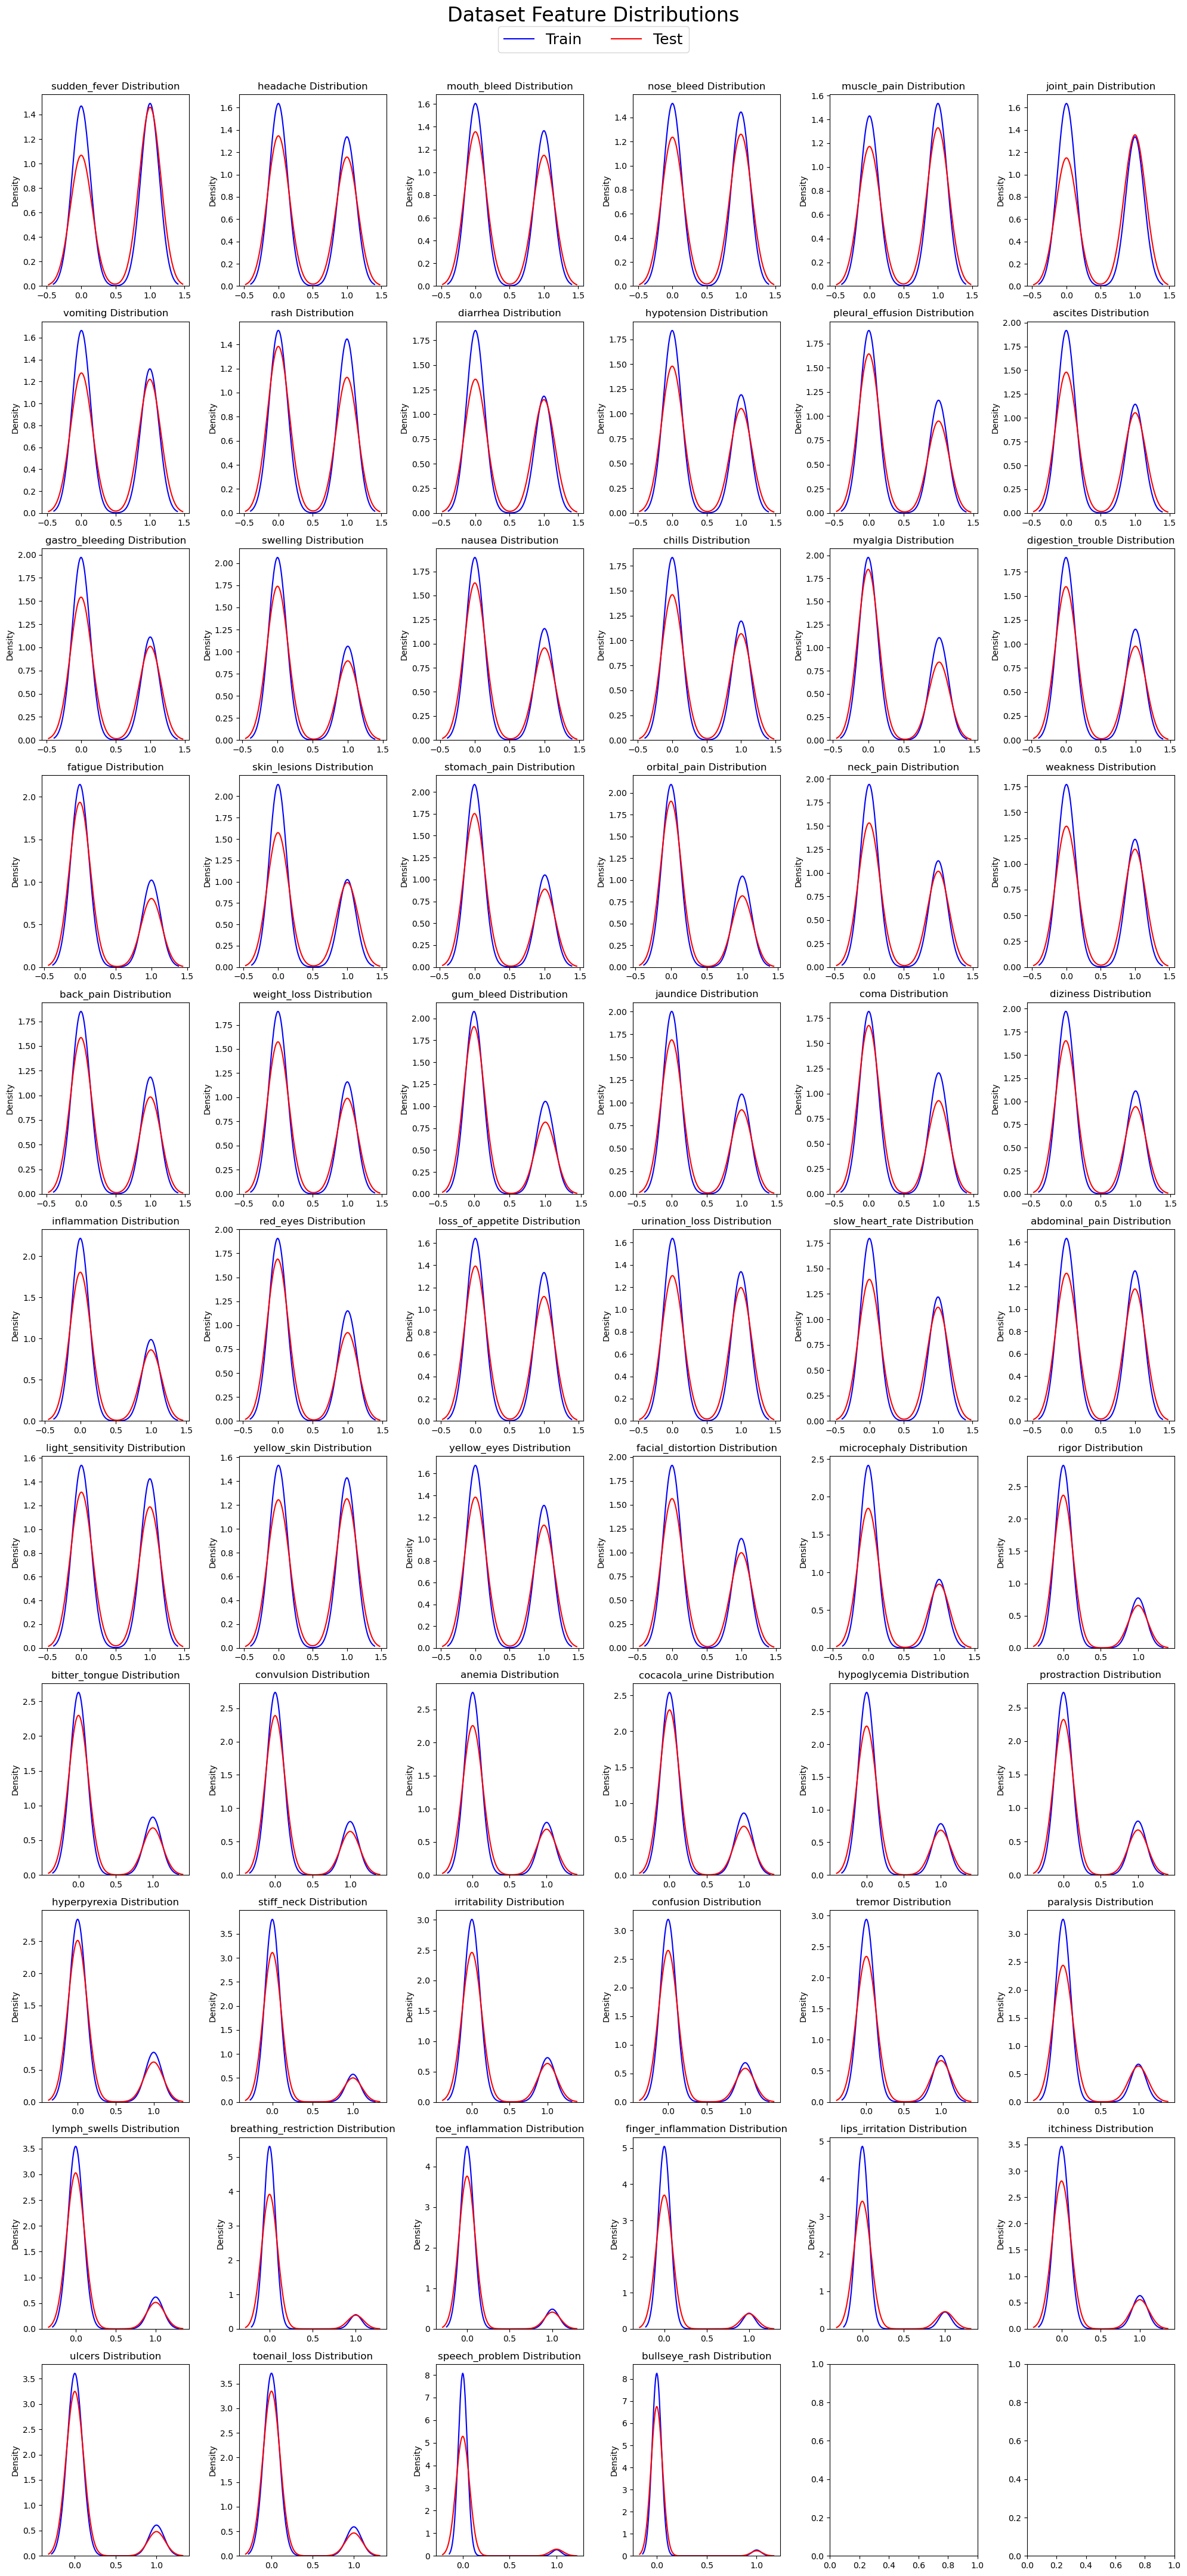

In [4]:
# kudos to @jcaliz and @sergiosaharovskiy

features = (train_df.columns)[1:-1] #select columns to be used
n_bins = 4 #set number of bins
n_cols = 6 #set number of bins
n_rows = math.ceil(len(features)/n_cols) # set number of rows
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(features):
    #plot distributions
    plot_axes = [ax[i]]
    sns.kdeplot(
        train_df[column], label='Train',
        ax=ax[i], color='b')
    
    sns.kdeplot(
        test_df[column], label='Test',
        ax=ax[i], color='r')
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
    # remove axes to show only one at the end
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()

# title plot
fig.suptitle(f'Dataset Feature Distributions\n\n\n\n', ha='center', fontsize=24)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.975), fontsize=18, ncol=3)
plt.tight_layout()

# Observations on data distributions

Generally the distribution of the data in the test dataset reflects the distribution in the training dataset.

# Credit where credits due

@sergiosaharovskiy (https://www.kaggle.com/sergiosaharovskiy) has created a really thorogh EDA with Submission https://www.kaggle.com/code/sergiosaharovskiy/ps-s3e13-2023-eda-and-submission